# 第一章：机器学习分类算法

## 1 章节概览

- 目标：学习第一个公认的**机器学习**（*Machine Learning, ML*）分类算法——**感知机**（*Perceptron*）和**自适应线性神经元**（*Adaptive Linear Neurons*）。
<br></br>
- 内容：
  1. 了解机器学习历史，学习机器算法理论；
  2. 使用`pandas`、`NumPy`和`matplotlib`读取数据、处理数据和数据可视化；
  3. 用Python实现感知机算法，然后将其应用于Iris数据集，实现简单的线性分类。
<br></br>
- 依赖：`pandas`, `NumPy`, `matplotlib`.

---

## 2 人工神经元 & ML历史

### 2.1 早期历史
1943年，Warren McCullock 和 Walter Pitts 为了解大脑工作原理 --> 设计通用人工智能算法 --> 提出简化版脑细胞概念：McCullock-Pitts（MCP）神经元。
> （论文：A Logical Calculus of the Ideas Immanent in Nervous Activity）
<br></br>

神经元是大脑的神经细胞，作用是处理、传播电信号。
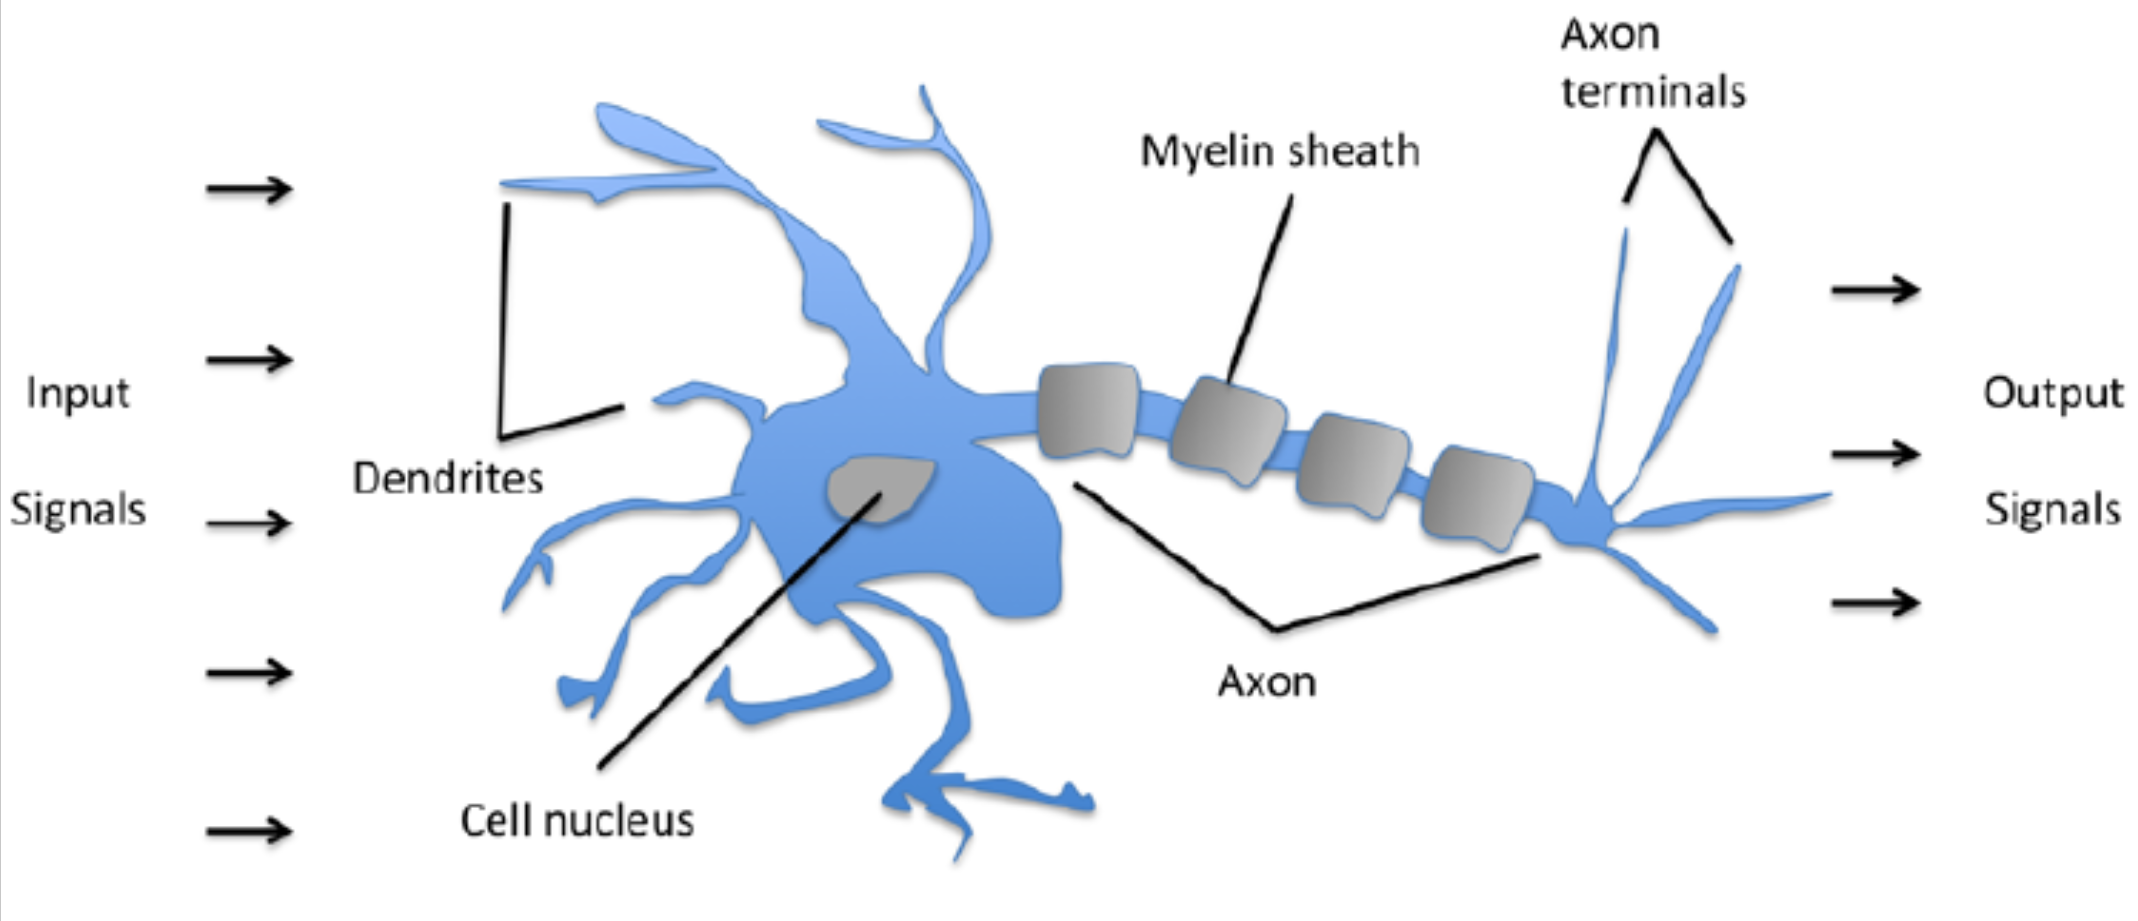

<br></br>
1957年，Frank Rosenblatt 基于MCP模型 -->发表了第一个感知机学习规则 --> 提出了能够自动学习最优权重参数的算法。
>（论文：The Perceptron, a Perceiving and Recognizing Automaton. Cornell Aeronautical Laboratory）
这个算法除了能学习权重参数，还能够预测一个样本是属于类别A还是类别B。

### 2.2 二分类问题
上面提到的“样本属于哪一类”问题即为**二分类问题**（*Binary Classification Task*）。感知机是这样解决二分类问题的：

1. 把其中涉及到的两个类别记作 $1$ (表示正类)和 $-1$ (表示负类)。
2. 定义一个激活函数(*Activation Function*) $\phi(z)$；
3. $x$ 是输入向量, $x=[x_{1}, ..., x_{m}]^{T}$，$w$ 是相应权重向量， $w=[w_{1}, ..., w_{m}]^{T}$。
4. 若某个样本 $x^{(i)}$ 的激活值，即 $\phi(z)$ 大于事先设置的阈值 $\theta$ ,我们就说样本 $x^{(i)}$ 属于类别 $1$ ，否则属于类别 $-1$ 。

在感知机学习算法中，激活函数 $\phi(\cdot)$ 的形式非常简单，仅仅是一个单位阶跃函数(也被称为Heaviside阶跃函数):
$$
\phi(z) = 
\begin{cases} 
\ \  1 \  \quad if \ \  z\geq \theta \\
-1 \quad otherwise
\end{cases}
$$
为方便推导，可以将阈值 $\theta$ 挪到不等式左边并且额外定义一个权重参数 $w_{0}=-\theta$ 。 这样 $z$ 可以用更加紧凑形式表示 $z=w_{0}+w_{1}x_{1}+...+w_{m}x_{m}=w^{T}x$ ，此时：
$$
\phi(z) = 
\begin{cases} 
\ \  1 \  \quad if \ \  z\geq 0 \\
-1 \quad otherwise
\end{cases}
$$
左图描述了感知机的激活函数怎样将网络输入 $z=w^{T}x$ 压缩到二元输出 $(-1,1)$ ，右图描述了感知机如何区分两个线性可分的类别。
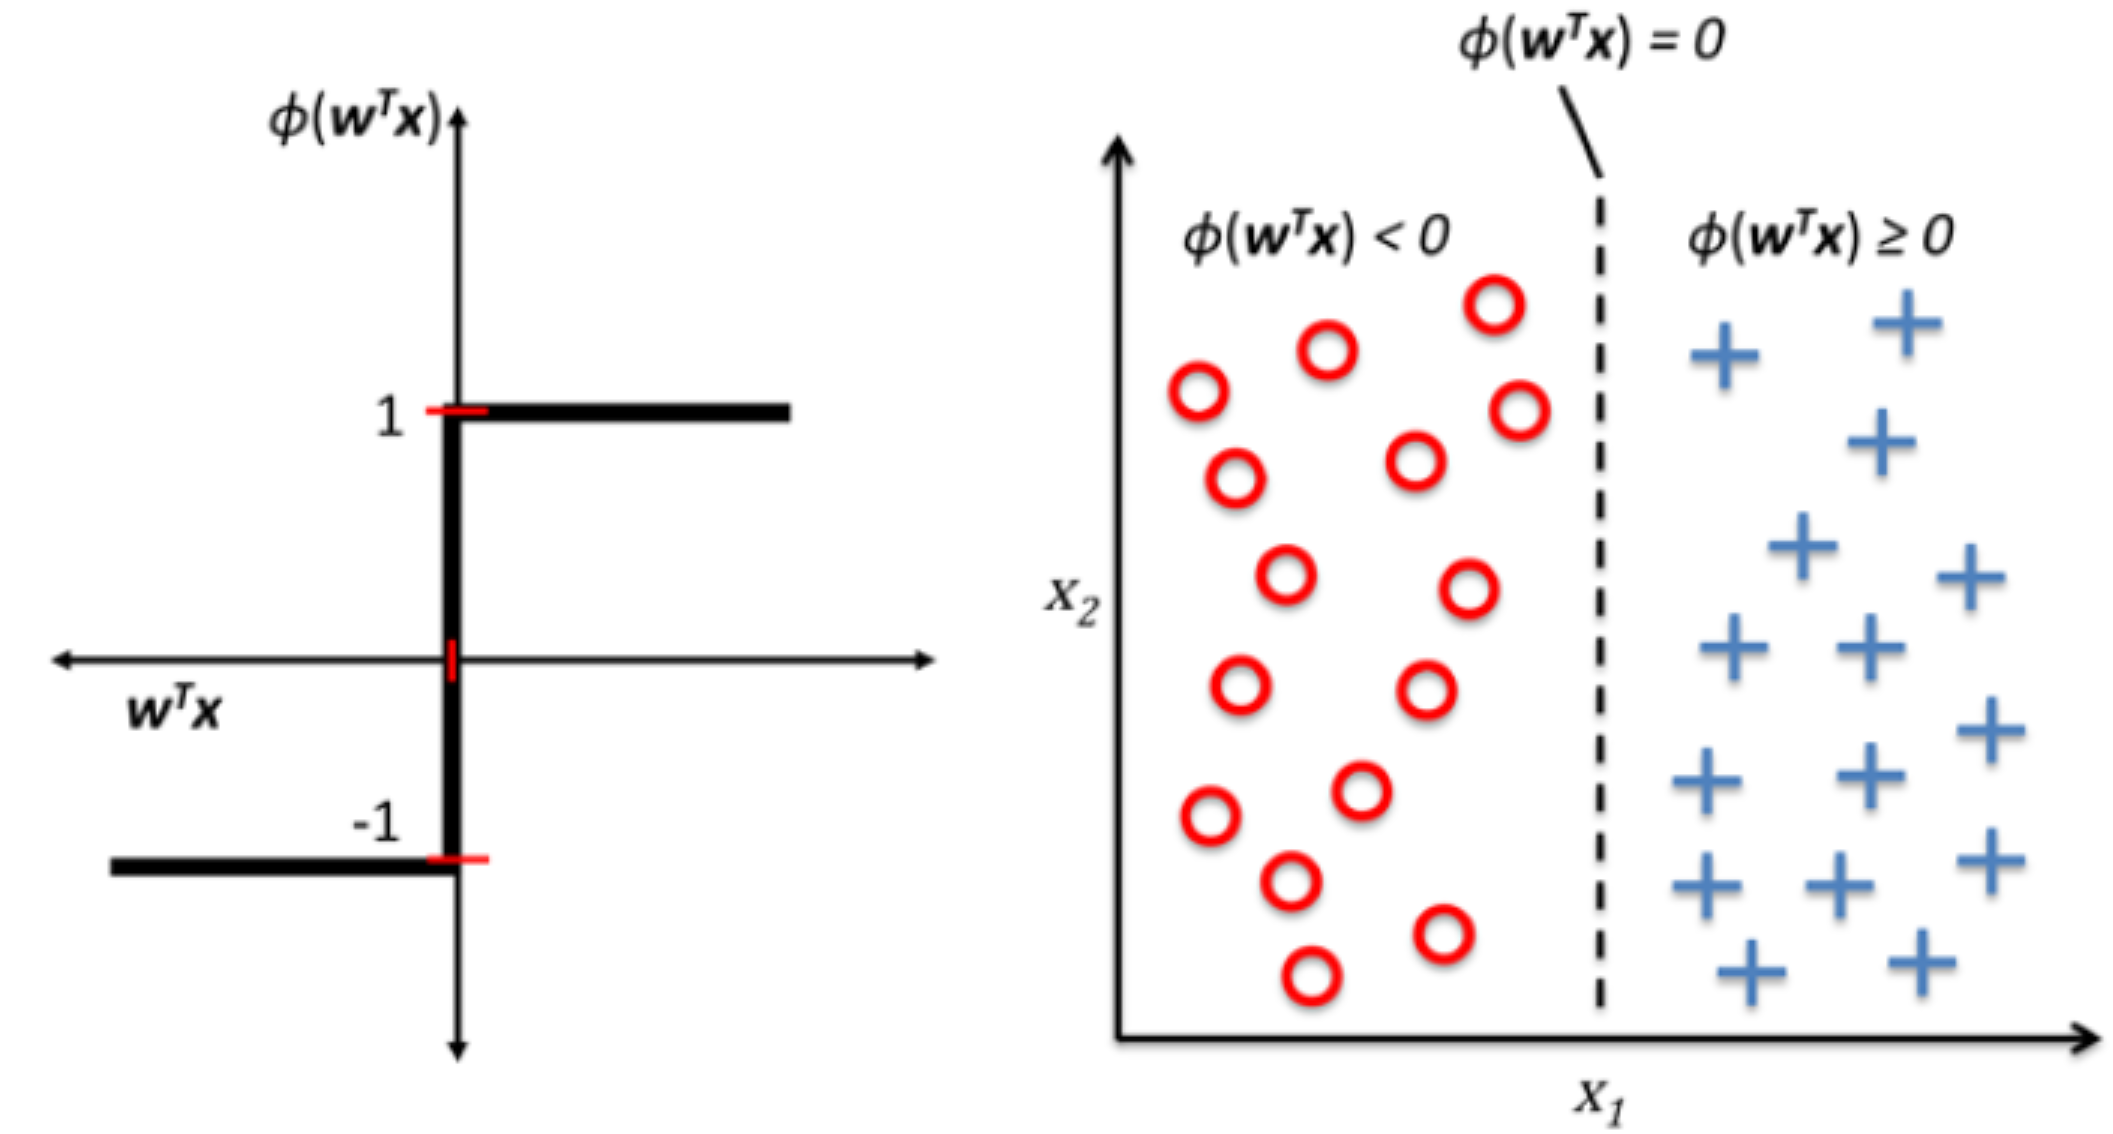

<br/br>
不论 MCP 神经元还是 Rosenblatt 的阈值感知机模型，他们背后的idea都是试图使用简单的方法来模拟大脑中单个神经元的工作方式：要么传递信号要么不传递。因此，Rosenblatt 最初的感知机规则非常简单，步骤如下：
1. 将权重参数初始化为0或者很小的随机数
2. 对于每一个训练集样本 $x^{(i)}$ ,执行下面的步骤：
   1. 计算输出值 $\hat y$
   2. 更新权重参数 $w$

此处的输出值就是单位阶跃函数预测的类别 $(-1,1)$ ，权重参数向量 $w$ 每个 $w_j$ 的更新过程可以用数学语言表示为：
$$
\triangle w_j = \eta \  (y^{(i)} - \hat y^{(i)}) \ x^{(i)}_j\ 
$$

其中：
- $\eta$ 称为学习率（*learning rate*），是一个介于 0.0 - 1.0 之间的常数；
- $y^{(i)}$ 是第 $i$ 个训练样本的真实类别;
- $\hat y^{(i)}$ 是第 $i$ 个训练样本的预测类别。

通俗地说，在计算出一个 $\hat y^{(i)}$ 后,就能计算出样本 $i$ 对应的所有的 $\triangle w_j$ ，同时更新 $w$ 中的每一个权重参数，不断重复上述步骤。

## 2.3 感知机算法要点

感知机算法仅在两个类别确实线性可分并且学习率充分小的情况下才能保证收敛。如果两个类别不能被一个线性超平面分开，我们可以通过设置迭代次数(epoch)来停止算法的学习过程。

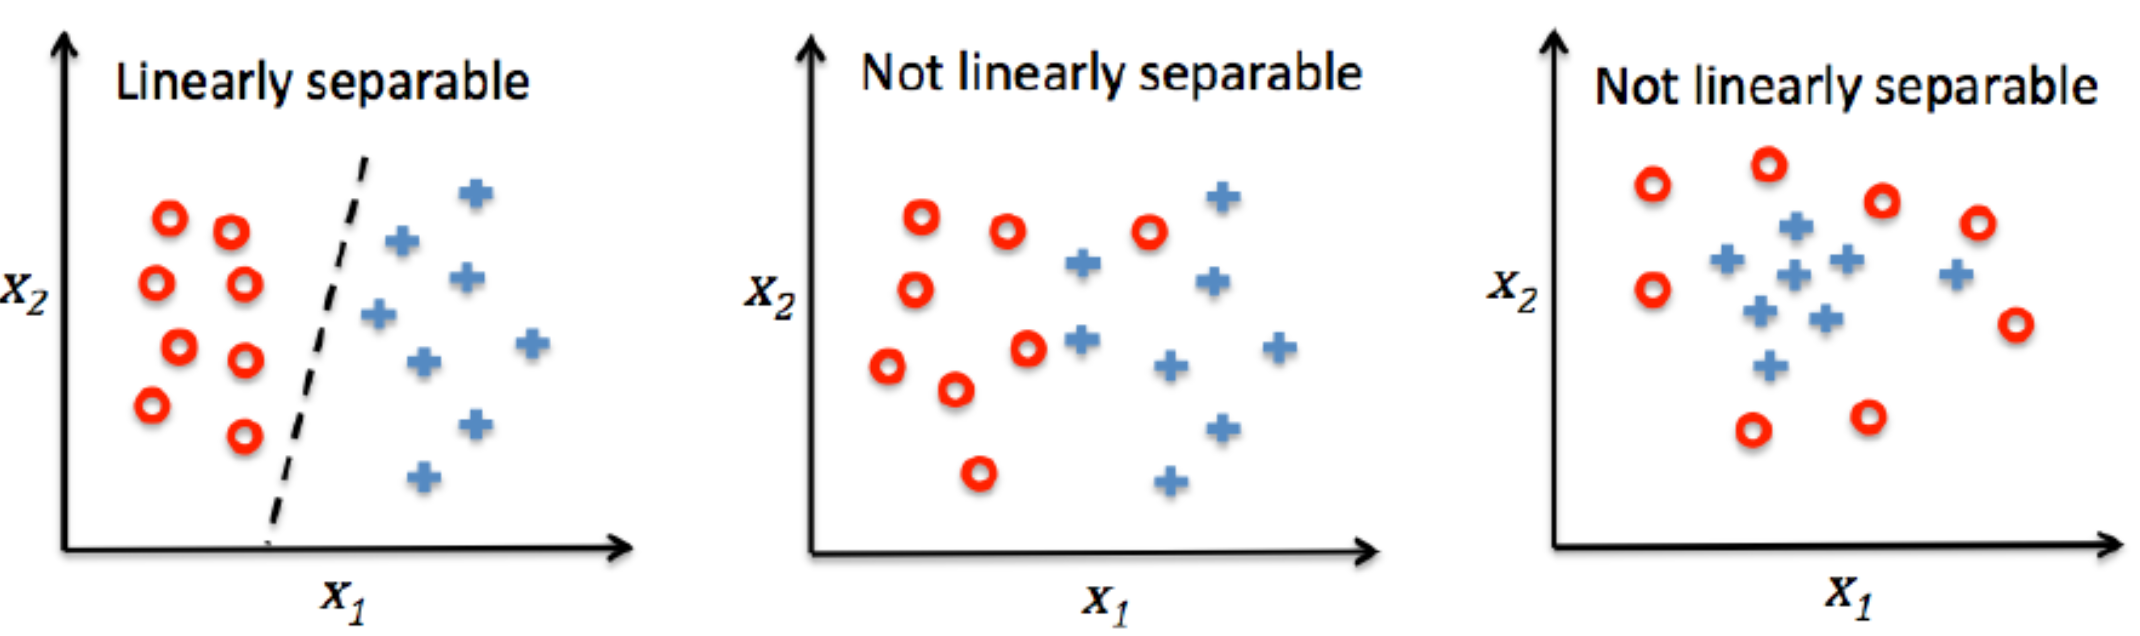

总结一下感知机的要点：

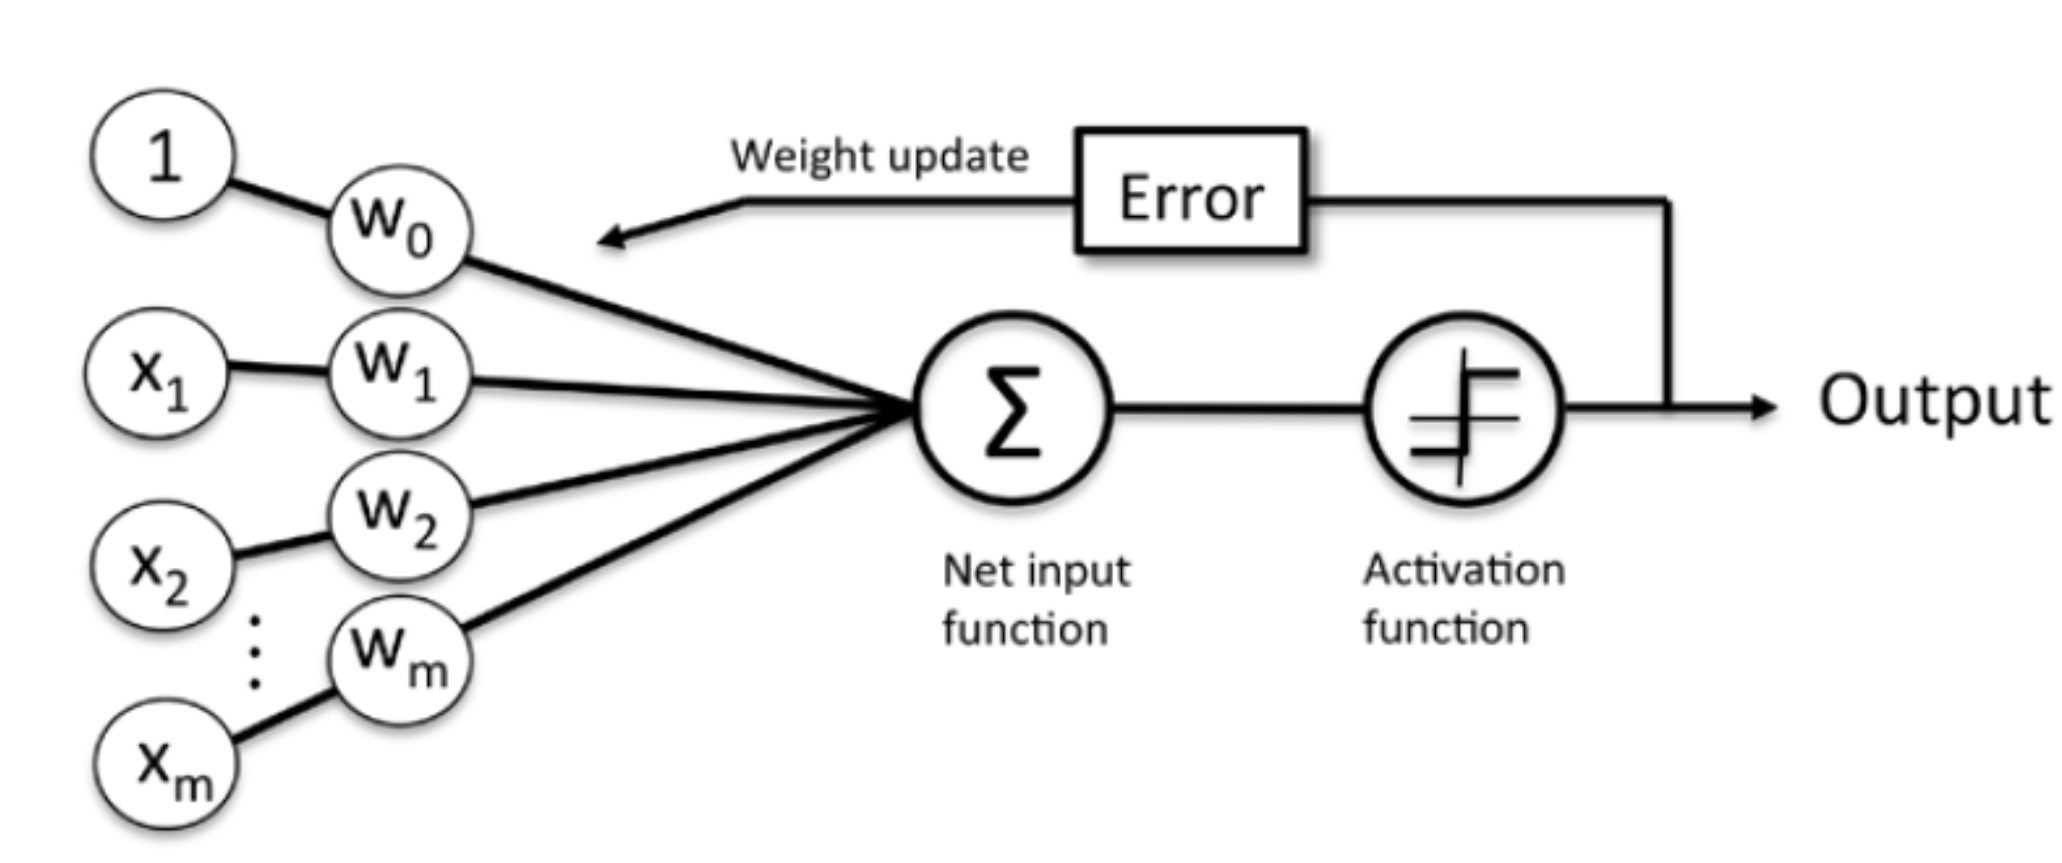
- 输入：样本 $x$ ，权重 $w$
- 过程：计算 $z$ ，$z$ 传递给激活函数，产生 $\hat y$ 二分类输出-1或1作为预测的样本类别。输出用于计算预测错误率 $(y - \hat y)$ 和更新权重参数 $w$ 。
- 输出：更新权重参数 $w$ 后的感知机模型（用于同类样本预测）

---

## 3 实现：感知机算法
在前一节，我们学习了Rosenblatt感知机算法；这一节我们用Python对其进行编码实现，并且应用于Iris数据集。
先安装依赖：

In [1]:
!conda install numpy pandas matplotlib

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
| DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/linux-64/current_repodata.json HTTP/1.1" 304 0
/ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/linux-64/current_repodata.json HTTP/1.1" 200 None
- DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
done
Solving environment: done

# All requested packages already installed.




### 3.1 代码实现
关于代码的实现，使用面向对象的编程思想，定义一个感知机算法类，类中的方法主要有初始化方法，训练(fit)方法和预测(predict)方法。

In [2]:
import numpy as np

class Perceptron(object):
    """
    [感知机分类器]
    参数: 
    ------------
    eta:float
    学习率 (between 0.0 and 1.0, default 0.01)
    n_iter:int
    学习的轮次 (default 0.01)

    状态: 
    -------------
    w_: 1d-array
    训练后的权重
    errors_: list
    每次迭代结束后的分类错误率

    """

    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """
        [训练数据]

        参数: 
        ------------
        X: {array-like}, shape=[n_samples, n_features]
        样本向量: 前 n_samples 个用于训练，后 n_features 个用于预测
        y: array-like, shape=[n_samples]
        目标向量

        返回值: 
        ----------
        self: object
        """
        self.w_ = np.zeros(1 + X.shape[1]) # Add w_0
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """计算网格输入"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """返回预测的目标值"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

fit方法先对权重参数初始化，然后遍历训练集中每一个样本，根据感知机算法对权重进行更新。类别通过predict方法进行预测。除此之外，self.errors_ 还记录了每一轮中误分类的样本数，有助于接下来我们分析感知机的训练过程。


### 3.2 基于Iris数据集训练感知机模型

我们使用Iris数据集检验上面的感知机代码，由于我们实现的是一个二分类感知机算法，所以我们仅使用Iris中Setosa和Versicolor两种花的数据。为了简便，我们仅使用sepal length和petal length两维度的特征。记住，感知机模型不局限于二分类问题，可以用通过One-vs-All技巧扩展到多分类问题。

One-vs-All(OvA)有时也被称为One-vs-Rest(OvR)，是一种常用的将二分类分类器扩展为多分类分类器的技巧。通过OvA技巧，我们为每一个类别训练一个分类器，此时，对应类别为正类，其余所有类别为负类。对新样本数据进行类别预测时，我们使用训练好的所有类别模型对其预测，将具有最高置信度的类别作为最后的结果。

回到刚才的Iris数据集，使用pandas读取数据，然后通过pandas中的tail方法输出最后五行数据，看一下Iris数据集格式:

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [5]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


接下来我们抽取出前100条样本，这正好是Setosa和Versicolor对应的样本，我们将Versicolor对应的数据作为类别1，Setosa对应的作为-1。对于特征，我们抽取出sepal length和petal length两维度特征，然后用散点图对数据进行可视化:

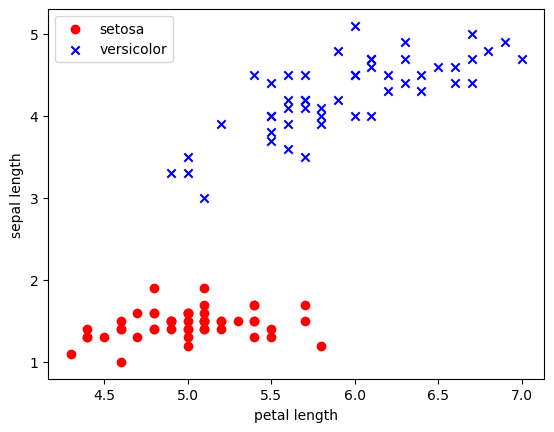

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

y = df.iloc[0:100, 4].values # 取前100条，
y = np.where(y == 'Iris-setosa', -1, 1) # Versicolor -> 1, Setosa -> -1
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

现在开始训练我们的感知机模型，为了更好地了解感知机训练过程，我们将每一轮的误分类数目可视化出来，检查算法是否收敛和找到分界线：